In [1]:

# check version
import tensorflow
print(tensorflow.__version__)
from tensorflow import keras
from utils import plot_decision_boundary, sigmoid, load_dataset, load_extra_datasets
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import sklearn.datasets
import sklearn.linear_model

2.16.1


In [2]:
X,Y = load_dataset()

In [3]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


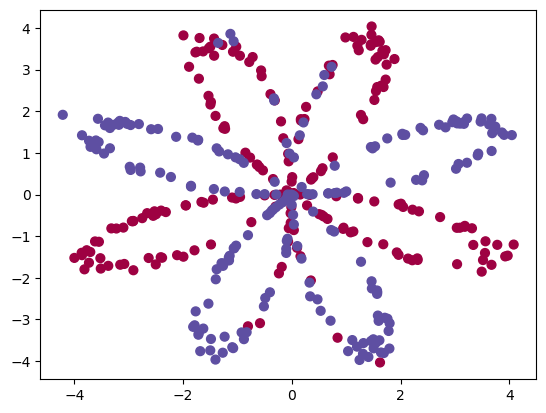

In [4]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [5]:
from sklearn.model_selection import train_test_split
X = X.T
Y = Y.T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
# Adjusting the provided code snippet to work with the new setup where we have already transposed X and Y
# And now we will further split the training set into training and validation sets
# Assuming X_train and Y_train are already defined from the previous operation

# Split the training data into training and validation sets with an 80-20 split within the training data
# Using the train_test_split function again to split the training data
X_train_new, X_valid, Y_train_new, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Print shapes of the new splits to verify
(X_train_new.shape, X_valid.shape, Y_train_new.shape, Y_valid.shape)


((240, 2), (80, 2), (240, 1), (80, 1))

In [7]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam

In [8]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [9]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\bilge\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5056 - loss: 0.6834 - val_accuracy: 0.7625 - val_loss: 0.6526
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7839 - loss: 0.6405 - val_accuracy: 0.7625 - val_loss: 0.6368
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.6100 - val_accuracy: 0.7750 - val_loss: 0.6120
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8189 - loss: 0.5916 - val_accuracy: 0.7875 - val_loss: 0.5899
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8159 - loss: 0.5594 - val_accuracy: 0.8125 - val_loss: 0.5747
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8222 - loss: 0.5306 - val_accuracy: 0.8125 - val_loss: 0.5552
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.5224 - val_accuracy: 0.8125 - val_loss: 0.5349
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8287 - loss: 0.4871 - val_accuracy: 0.8625 - val_loss: 0.5072
Epoch 9

In [12]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 64)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9035 - loss: 0.2370 - val_accuracy: 0.8375 - val_loss: 0.3241
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8776 - loss: 0.2636 - val_accuracy: 0.8375 - val_loss: 0.3224
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9021 - loss: 0.2515 - val_accuracy: 0.8375 - val_loss: 0.3167
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8953 - loss: 0.2463 - val_accuracy: 0.8375 - val_loss: 0.3132
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8964 - loss: 0.2435 - val_accuracy: 0.8375 - val_loss: 0.3095
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8833 - loss: 0.2560 - val_accuracy: 0.8375 - val_loss: 0.3112
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9031 - loss: 0.2271 - val_accuracy: 0.8375 - val_loss: 0.3126
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9083 - loss: 0.2398 - val_accuracy: 0.8375 - val_loss: 0.3099
Epo

In [13]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 128)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9047 - loss: 0.2009 - val_accuracy: 0.8375 - val_loss: 0.2910
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8969 - loss: 0.2080 - val_accuracy: 0.8375 - val_loss: 0.2918
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9075 - loss: 0.2061 - val_accuracy: 0.8375 - val_loss: 0.2925
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8892 - loss: 0.2196 - val_accuracy: 0.8375 - val_loss: 0.2936
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8944 - loss: 0.2169 - val_accuracy: 0.8375 - val_loss: 0.2948
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8997 - loss: 0.2068 - val_accuracy: 0.8375 - val_loss: 0.2942
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8970 - loss: 0.2170 - val_accuracy: 0.8375 - val_loss: 0.2943
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9127 - loss: 0.1894 - val_accuracy: 0.8375 - val_loss: 0.2933


In [14]:
model = Sequential()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [15]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5150 - loss: 0.6773 - val_accuracy: 0.6750 - val_loss: 0.6276
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7486 - loss: 0.5722 - val_accuracy: 0.8375 - val_loss: 0.5108
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8874 - loss: 0.4592 - val_accuracy: 0.8375 - val_loss: 0.4348
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8654 - loss: 0.3782 - val_accuracy: 0.8250 - val_loss: 0.3977
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8399 - loss: 0.3970 - val_accuracy: 0.7750 - val_loss: 0.4305
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8169 - loss: 0.3878 - val_accuracy: 0.8125 - val_loss: 0.3721
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8698 - loss: 0.3636 - val_accuracy: 0.8375 - val_loss: 0.3679
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9013 - loss: 0.3509 - val_accuracy: 0.8500 - val_loss: 0.3234
Epoch 9

In [18]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 128)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9182 - loss: 0.1692 - val_accuracy: 0.8375 - val_loss: 0.3152
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9104 - loss: 0.1758 - val_accuracy: 0.8375 - val_loss: 0.3077
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9078 - loss: 0.1774 - val_accuracy: 0.8250 - val_loss: 0.2986
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9024 - loss: 0.1728 - val_accuracy: 0.8125 - val_loss: 0.2967
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9056 - loss: 0.1859 - val_accuracy: 0.7875 - val_loss: 0.2972
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9184 - loss: 0.1690 - val_accuracy: 0.7750 - val_loss: 0.2983
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9340 - loss: 0.1490 - val_accuracy: 0.7750 - val_loss: 0.2986
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9186 - loss: 0.1585 - val_accuracy: 0.7750 - val_loss: 0.2977


In [19]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam

In [20]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [21]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam',  
              loss='mean_squared_error',  
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3987 - loss: 0.2704 - val_accuracy: 0.5625 - val_loss: 0.2393
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6528 - loss: 0.2367 - val_accuracy: 0.6000 - val_loss: 0.2291
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7531 - loss: 0.2154 - val_accuracy: 0.6250 - val_loss: 0.2227
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7471 - loss: 0.2046 - val_accuracy: 0.6625 - val_loss: 0.2146
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7674 - loss: 0.1923 - val_accuracy: 0.7000 - val_loss: 0.2050
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7897 - loss: 0.1807 - val_accuracy: 0.7750 - val_loss: 0.1931
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8218 - loss: 0.1740 - val_accuracy: 0.8250 - val_loss: 0.1811
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8988 - loss: 0.1661 - val_accuracy: 0.8125 - val_loss: 0.1723
Epoch 9

In [24]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 64)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9048 - loss: 0.0766 - val_accuracy: 0.8375 - val_loss: 0.1138
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9001 - loss: 0.0838 - val_accuracy: 0.8375 - val_loss: 0.1127
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8985 - loss: 0.0845 - val_accuracy: 0.8375 - val_loss: 0.1092
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8923 - loss: 0.0854 - val_accuracy: 0.8375 - val_loss: 0.1083
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9031 - loss: 0.0783 - val_accuracy: 0.8375 - val_loss: 0.1095
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9010 - loss: 0.0791 - val_accuracy: 0.8375 - val_loss: 0.1102
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8999 - loss: 0.0748 - val_accuracy: 0.8375 - val_loss: 0.1096
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9167 - loss: 0.0691 - val_accuracy: 0.8375 - val_loss: 0.1108
Epoch 9

In [25]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 128)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9207 - loss: 0.0654 - val_accuracy: 0.8125 - val_loss: 0.1112
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9130 - loss: 0.0682 - val_accuracy: 0.8375 - val_loss: 0.1098
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9179 - loss: 0.0640 - val_accuracy: 0.8375 - val_loss: 0.1089
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9050 - loss: 0.0694 - val_accuracy: 0.8375 - val_loss: 0.1078
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9076 - loss: 0.0679 - val_accuracy: 0.8375 - val_loss: 0.1072
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9128 - loss: 0.0672 - val_accuracy: 0.8375 - val_loss: 0.1075
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9102 - loss: 0.0656 - val_accuracy: 0.8375 - val_loss: 0.1085
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9049 - loss: 0.0665 - val_accuracy: 0.8250 - val_loss: 0.1095


In [26]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8965 - loss: 0.0660 - val_accuracy: 0.8125 - val_loss: 0.1087
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8768 - loss: 0.0732 - val_accuracy: 0.8125 - val_loss: 0.1135
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9098 - loss: 0.0665 - val_accuracy: 0.8250 - val_loss: 0.1072
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9259 - loss: 0.0641 - val_accuracy: 0.8375 - val_loss: 0.1116
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8947 - loss: 0.0856 - val_accuracy: 0.8375 - val_loss: 0.1026
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9319 - loss: 0.0556 - val_accuracy: 0.8500 - val_loss: 0.1002
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9217 - loss: 0.0649 - val_accuracy: 0.7875 - val_loss: 0.1099
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8934 - loss: 0.0645 - val_accuracy: 0.8375 - val_loss: 0.1060


In [27]:
model = Sequential()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [28]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam',  
              loss='mean_squared_error',  
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5539 - loss: 0.2422 - val_accuracy: 0.5875 - val_loss: 0.2387
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6735 - loss: 0.2170 - val_accuracy: 0.5125 - val_loss: 0.2312
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6508 - loss: 0.2089 - val_accuracy: 0.5875 - val_loss: 0.2204
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7189 - loss: 0.1947 - val_accuracy: 0.6750 - val_loss: 0.2113
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7653 - loss: 0.1948 - val_accuracy: 0.7250 - val_loss: 0.2034
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8003 - loss: 0.1832 - val_accuracy: 0.7375 - val_loss: 0.1950
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8064 - loss: 0.1755 - val_accuracy: 0.8000 - val_loss: 0.1839
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.1647 - val_accuracy: 0.8000 - val_loss: 0.1761
Epoch 9

In [31]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8979 - loss: 0.0844 - val_accuracy: 0.8375 - val_loss: 0.1145
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9075 - loss: 0.0776 - val_accuracy: 0.8375 - val_loss: 0.1101
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9060 - loss: 0.0858 - val_accuracy: 0.8375 - val_loss: 0.1076
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9071 - loss: 0.0798 - val_accuracy: 0.8375 - val_loss: 0.1124
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9125 - loss: 0.0831 - val_accuracy: 0.8250 - val_loss: 0.1102
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8973 - loss: 0.0886 - val_accuracy: 0.8500 - val_loss: 0.1079
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9181 - loss: 0.0756 - val_accuracy: 0.8375 - val_loss: 0.1115
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8946 - loss: 0.0846 - val_accuracy: 0.8375 - val_loss: 0.1081
Epoch 9

In [32]:
model = Sequential()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [33]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop',  
              loss='mean_squared_error',  
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5450 - loss: 0.2421 - val_accuracy: 0.6375 - val_loss: 0.2309
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7084 - loss: 0.2164 - val_accuracy: 0.6375 - val_loss: 0.2203
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7383 - loss: 0.2051 - val_accuracy: 0.7625 - val_loss: 0.2104
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7728 - loss: 0.1968 - val_accuracy: 0.8375 - val_loss: 0.2016
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8752 - loss: 0.1911 - val_accuracy: 0.7375 - val_loss: 0.2012
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8043 - loss: 0.1860 - val_accuracy: 0.7625 - val_loss: 0.1918
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8265 - loss: 0.1709 - val_accuracy: 0.8500 - val_loss: 0.1795
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8570 - loss: 0.1695 - val_accuracy: 0.8500 - val_loss: 0.1723
Epoch 9

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [37]:
model = Sequential()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [38]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


sgd_optimizer = SGD(learning_rate=0.01)


model.compile(optimizer=sgd_optimizer,  
              loss='mean_squared_error',  
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)


scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {scores[0]}, Test Accuracy: {scores[1]}")


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6378 - loss: 0.2544 - val_accuracy: 0.7500 - val_loss: 0.2404
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6137 - loss: 0.2506 - val_accuracy: 0.7500 - val_loss: 0.2391
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5868 - loss: 0.2529 - val_accuracy: 0.7125 - val_loss: 0.2379
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6116 - loss: 0.2462 - val_accuracy: 0.7125 - val_loss: 0.2367
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5680 - loss: 0.2485 - val_accuracy: 0.6875 - val_loss: 0.2355
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5836 - loss: 0.2476 - val_accuracy: 0.6500 - val_loss: 0.2345
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5799 - loss: 0.2484 - val_accuracy: 0.6375 - val_loss: 0.2334
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5806 - loss: 0.2451 - val_accuracy: 0.6375 - val_loss

In [39]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5707 - loss: 0.2431 - val_accuracy: 0.5500 - val_loss: 0.2443
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6221 - loss: 0.2409 - val_accuracy: 0.5500 - val_loss: 0.2441
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5696 - loss: 0.2439 - val_accuracy: 0.5500 - val_loss: 0.2440
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6143 - loss: 0.2361 - val_accuracy: 0.5375 - val_loss: 0.2438
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6095 - loss: 0.2360 - val_accuracy: 0.5500 - val_loss: 0.2436
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5906 - loss: 0.2391 - val_accuracy: 0.5500 - val_loss: 0.2436
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5831 - loss: 0.2394 - val_accuracy: 0.5500 - val_loss: 0.2435
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5913 - loss: 0.2389 - val_accuracy: 0.5125 - val_loss: 0.2434
Epoch 9/

In [40]:
model = Sequential()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dropout(0.2), 
    Dense(64, activation='relu'),
    Dropout(0.2),  
    Dense(32, activation='relu'),
    Dropout(0.2),  
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [42]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5093 - loss: 0.2555 - val_accuracy: 0.4500 - val_loss: 0.2457
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5704 - loss: 0.2378 - val_accuracy: 0.4875 - val_loss: 0.2416
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5653 - loss: 0.2369 - val_accuracy: 0.5625 - val_loss: 0.2346
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6004 - loss: 0.2303 - val_accuracy: 0.5875 - val_loss: 0.2282
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5727 - loss: 0.2284 - val_accuracy: 0.5625 - val_loss: 0.2268
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6538 - loss: 0.2217 - val_accuracy: 0.5875 - val_loss: 0.2219
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6498 - loss: 0.2140 - val_accuracy: 0.5875 - val_loss: 0.2155
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6851 - loss: 0.2054 - val_accuracy: 0.6125 - val_loss: 0.2116
Epoch 9

In [43]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8726 - loss: 0.1203 - val_accuracy: 0.8375 - val_loss: 0.1280
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8768 - loss: 0.1204 - val_accuracy: 0.8250 - val_loss: 0.1252
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8725 - loss: 0.1129 - val_accuracy: 0.8250 - val_loss: 0.1262
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8598 - loss: 0.1184 - val_accuracy: 0.8125 - val_loss: 0.1291
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8594 - loss: 0.1222 - val_accuracy: 0.8375 - val_loss: 0.1268
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8719 - loss: 0.1134 - val_accuracy: 0.8500 - val_loss: 0.1227
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8881 - loss: 0.1055 - val_accuracy: 0.8500 - val_loss: 0.1236
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9128 - loss: 0.0986 - val_accuracy: 0.8250 - val_loss: 0.1260


In [44]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 64)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8932 - loss: 0.0900 - val_accuracy: 0.8375 - val_loss: 0.1091
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9103 - loss: 0.0848 - val_accuracy: 0.8375 - val_loss: 0.1093
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8783 - loss: 0.0997 - val_accuracy: 0.8375 - val_loss: 0.1096
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8838 - loss: 0.0940 - val_accuracy: 0.8375 - val_loss: 0.1099
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9128 - loss: 0.0769 - val_accuracy: 0.8375 - val_loss: 0.1096
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8888 - loss: 0.0877 - val_accuracy: 0.8375 - val_loss: 0.1090
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8960 - loss: 0.0991 - val_accuracy: 0.8375 - val_loss: 0.1086
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8885 - loss: 0.0951 - val_accuracy: 0.8375 - val_loss: 0.1085
Epoch

In [45]:
model = Sequential()
learning_rate = 0.1
optimizer = Adam(learning_rate=learning_rate)

In [46]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='sgd',  
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [47]:
h = model.fit(X_train_new, Y_train_new, epochs=200, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6569 - loss: 0.6802 - val_accuracy: 0.6750 - val_loss: 0.6645
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6690 - loss: 0.6734 - val_accuracy: 0.6875 - val_loss: 0.6632
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6935 - loss: 0.6753 - val_accuracy: 0.7000 - val_loss: 0.6623
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6731 - loss: 0.6690 - val_accuracy: 0.7125 - val_loss: 0.6614
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7028 - loss: 0.6673 - val_accuracy: 0.7250 - val_loss: 0.6608
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7500 - loss: 0.6626 - val_accuracy: 0.7125 - val_loss: 0.6603
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8075 - loss: 0.6596 - val_accuracy: 0.7000 - val_loss: 0.6597
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7764 - loss: 0.6566 - val_accuracy: 0.7000 - val_loss: 0.6591

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8650 - loss: 0.5059 - val_accuracy: 0.8125 - val_loss: 0.5427
Epoch 104/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8936 - loss: 0.4933 - val_accuracy: 0.8125 - val_loss: 0.5401
Epoch 105/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8695 - loss: 0.5093 - val_accuracy: 0.8125 - val_loss: 0.5396
Epoch 106/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8630 - loss: 0.4923 - val_accuracy: 0.8125 - val_loss: 0.5384
Epoch 107/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8895 - loss: 0.4888 - val_accuracy: 0.8250 - val_loss: 0.5367
Epoch 108/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9049 - loss: 0.4795 - val_accuracy: 0.8250 - val_loss: 0.5353
Epoch 109/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9000 - loss: 0.4671 - val_accuracy: 0.8250 - val_loss: 0.5347
Epoch 110/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8880 - loss: 0.4838 - val_accuracy: 0.8250 - val_loss: 0.53

Epoch 154/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8923 - loss: 0.4445 - val_accuracy: 0.8375 - val_loss: 0.4838
Epoch 155/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8834 - loss: 0.4614 - val_accuracy: 0.8375 - val_loss: 0.4826
Epoch 156/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8949 - loss: 0.4432 - val_accuracy: 0.8375 - val_loss: 0.4818
Epoch 157/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8688 - loss: 0.4473 - val_accuracy: 0.8625 - val_loss: 0.4804
Epoch 158/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.4252 - val_accuracy: 0.8375 - val_loss: 0.4802
Epoch 159/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8710 - loss: 0.4323 - val_accuracy: 0.8625 - val_loss: 0.4791
Epoch 160/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.4278 - val_accuracy: 0.8625 - val_loss: 0.4778
Epoch 161/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.4823 - val_accuracy: 0.8625 - v

In [48]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [49]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='sgd',  
              loss='mean_squared_error',  
              metrics=['accuracy'])

In [50]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4470 - loss: 0.2528 - val_accuracy: 0.3500 - val_loss: 0.2565
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4399 - loss: 0.2507 - val_accuracy: 0.3500 - val_loss: 0.2555
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4287 - loss: 0.2507 - val_accuracy: 0.3625 - val_loss: 0.2545
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4359 - loss: 0.2488 - val_accuracy: 0.3625 - val_loss: 0.2535
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4484 - loss: 0.2456 - val_accuracy: 0.3625 - val_loss: 0.2526
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4448 - loss: 0.2455 - val_accuracy: 0.3875 - val_loss: 0.2515
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4767 - loss: 0.2418 - val_accuracy: 0.4000 - val_loss: 0.2506
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4484 - loss: 0.2425 - val_accuracy: 0.4125 - val_loss: 0.2497
Epoch 9

In [51]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [52]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='sgd',  
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [53]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 64)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4589 - loss: 0.6878 - val_accuracy: 0.5125 - val_loss: 0.6662
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4354 - loss: 0.6915 - val_accuracy: 0.5250 - val_loss: 0.6653
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4832 - loss: 0.6860 - val_accuracy: 0.5000 - val_loss: 0.6643
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5433 - loss: 0.6798 - val_accuracy: 0.5250 - val_loss: 0.6634
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5367 - loss: 0.6798 - val_accuracy: 0.5875 - val_loss: 0.6625
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5745 - loss: 0.6731 - val_accuracy: 0.5750 - val_loss: 0.6617
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5673 - loss: 0.6724 - val_accuracy: 0.5750 - val_loss: 0.6608
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5798 - loss: 0.6687 - val_accuracy: 0.5875 - val_loss: 0.6598
Epoch

In [54]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7434 - loss: 0.6126 - val_accuracy: 0.7375 - val_loss: 0.6227
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7665 - loss: 0.6050 - val_accuracy: 0.7250 - val_loss: 0.6214
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8073 - loss: 0.6030 - val_accuracy: 0.7250 - val_loss: 0.6199
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.5973 - val_accuracy: 0.7250 - val_loss: 0.6186
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7815 - loss: 0.6025 - val_accuracy: 0.7250 - val_loss: 0.6169
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7800 - loss: 0.6009 - val_accuracy: 0.7375 - val_loss: 0.6150
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7745 - loss: 0.6107 - val_accuracy: 0.7250 - val_loss: 0.6134
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7779 - loss: 0.5982 - val_accuracy: 0.7250 - val_loss: 0.6122


In [55]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [56]:
model.add(Dense(128, activation='relu', input_shape=(2,))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))  
model.add(Dense(64, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 


model.compile(optimizer='adam',  
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [57]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5394 - loss: 0.6824 - val_accuracy: 0.7625 - val_loss: 0.6458
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7880 - loss: 0.6276 - val_accuracy: 0.7125 - val_loss: 0.6198
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8157 - loss: 0.5702 - val_accuracy: 0.8375 - val_loss: 0.5780
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8125 - loss: 0.5562 - val_accuracy: 0.8250 - val_loss: 0.5365
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8651 - loss: 0.5034 - val_accuracy: 0.8375 - val_loss: 0.4863
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8865 - loss: 0.4462 - val_accuracy: 0.8375 - val_loss: 0.4492
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9027 - loss: 0.3711 - val_accuracy: 0.8625 - val_loss: 0.4258
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8818 - loss: 0.3998 - val_accuracy: 0.8375 - val_loss: 0.3979

In [58]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout,Activation
from keras.optimizers import Adam


In [59]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [60]:
model = Sequential()


model.add(Dense(128, input_shape=(2,)))
model.add(BatchNormalization())  
model.add(Activation('relu'))
model.add(Dropout(0.5))   


model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',  
              loss='binary_crossentropy',  
              metrics=['accuracy'])


In [61]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5724 - loss: 0.8435 - val_accuracy: 0.5000 - val_loss: 0.6859
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5028 - loss: 0.8389 - val_accuracy: 0.4750 - val_loss: 0.6879
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5441 - loss: 0.7858 - val_accuracy: 0.5250 - val_loss: 0.6767
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6261 - loss: 0.7029 - val_accuracy: 0.5750 - val_loss: 0.6664
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5789 - loss: 0.6942 - val_accuracy: 0.6000 - val_loss: 0.6540
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5557 - loss: 0.7327 - val_accuracy: 0.6625 - val_loss: 0.6464
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6253 - loss: 0.6370 - val_accuracy: 0.6375 - val_loss: 0.6417
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6788 - loss: 0.6192 - val_accuracy: 0.6250 - val_loss: 0.6345

In [62]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [63]:
model.add(Dense(128, activation='relu', input_shape=(2,))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))  
model.add(Dense(64, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 


model.compile(optimizer='adam',  
              loss='MSE', 
              metrics=['accuracy'])

In [64]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 64)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5805 - loss: 0.2432 - val_accuracy: 0.6500 - val_loss: 0.2343
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7331 - loss: 0.2244 - val_accuracy: 0.5500 - val_loss: 0.2272
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7180 - loss: 0.2079 - val_accuracy: 0.6750 - val_loss: 0.2151
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7900 - loss: 0.1968 - val_accuracy: 0.7125 - val_loss: 0.2028
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8024 - loss: 0.1874 - val_accuracy: 0.8125 - val_loss: 0.1889
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8624 - loss: 0.1704 - val_accuracy: 0.8375 - val_loss: 0.1746
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8821 - loss: 0.1605 - val_accuracy: 0.8375 - val_loss: 0.1650
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8903 - loss: 0.1456 - val_accuracy: 0.8500 - val_loss: 0.1548

In [65]:
h = model.fit(X_train_new, Y_train_new, epochs=50, validation_data=(X_valid, Y_valid), batch_size = 64)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9103 - loss: 0.0589 - val_accuracy: 0.7750 - val_loss: 0.1110
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9294 - loss: 0.0535 - val_accuracy: 0.8250 - val_loss: 0.1070
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9128 - loss: 0.0563 - val_accuracy: 0.8000 - val_loss: 0.1160
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8988 - loss: 0.0625 - val_accuracy: 0.8125 - val_loss: 0.1121
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9229 - loss: 0.0526 - val_accuracy: 0.8250 - val_loss: 0.1101
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9164 - loss: 0.0508 - val_accuracy: 0.8375 - val_loss: 0.1092
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9024 - loss: 0.0612 - val_accuracy: 0.7750 - val_loss: 0.1151
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9170 - loss: 0.0545 - val_accuracy: 0.8000 - val_loss: 0.1090
Epoc

In [66]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [67]:
model.add(Dense(128, activation='relu', input_shape=(2,))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))  
model.add(Dense(64, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 


model.compile(optimizer='rmsprop',  
              loss='MSE', 
              metrics=['accuracy'])

In [68]:
h = model.fit(X_train_new, Y_train_new, epochs=200, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6004 - loss: 0.2393 - val_accuracy: 0.6375 - val_loss: 0.2289
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7195 - loss: 0.2047 - val_accuracy: 0.6125 - val_loss: 0.2136
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8034 - loss: 0.1861 - val_accuracy: 0.7125 - val_loss: 0.1956
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8191 - loss: 0.1707 - val_accuracy: 0.8000 - val_loss: 0.1679
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8599 - loss: 0.1562 - val_accuracy: 0.8125 - val_loss: 0.1553
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8919 - loss: 0.1333 - val_accuracy: 0.8375 - val_loss: 0.1465
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8907 - loss: 0.1342 - val_accuracy: 0.8000 - val_loss: 0.1460
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8645 - loss: 0.1331 - val_accuracy: 0.8000 - val_loss: 0.1380

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9176 - loss: 0.0570 - val_accuracy: 0.8125 - val_loss: 0.0986
Epoch 104/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.0594 - val_accuracy: 0.7875 - val_loss: 0.1091
Epoch 105/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8738 - loss: 0.0672 - val_accuracy: 0.8375 - val_loss: 0.1076
Epoch 106/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8957 - loss: 0.0667 - val_accuracy: 0.8125 - val_loss: 0.1087
Epoch 107/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8722 - loss: 0.0724 - val_accuracy: 0.8000 - val_loss: 0.1147
Epoch 108/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9041 - loss: 0.0611 - val_accuracy: 0.8375 - val_loss: 0.1085
Epoch 109/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9197 - loss: 0.0615 - val_accuracy: 0.8375 - val_loss: 0.1045
Epoch 110/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9154 - loss: 0.0573 - val_accuracy: 0.8375 - val_loss: 0.106

Epoch 154/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8916 - loss: 0.0564 - val_accuracy: 0.8375 - val_loss: 0.1063
Epoch 155/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9128 - loss: 0.0612 - val_accuracy: 0.7875 - val_loss: 0.1108
Epoch 156/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9155 - loss: 0.0530 - val_accuracy: 0.8375 - val_loss: 0.1018
Epoch 157/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9038 - loss: 0.0571 - val_accuracy: 0.8375 - val_loss: 0.1115
Epoch 158/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9080 - loss: 0.0520 - val_accuracy: 0.8375 - val_loss: 0.1086
Epoch 159/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.0521 - val_accuracy: 0.7750 - val_loss: 0.1124
Epoch 160/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9060 - loss: 0.0555 - val_accuracy: 0.8250 - val_loss: 0.1093
Epoch 161/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9173 - loss: 0.0574 - val_accuracy: 0.8375 - v

In [69]:
model = Sequential()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [70]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='sgd',  
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [71]:
h = model.fit(X_train_new, Y_train_new, epochs=200, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5798 - loss: 0.6923 - val_accuracy: 0.5750 - val_loss: 0.6654
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5768 - loss: 0.6866 - val_accuracy: 0.5875 - val_loss: 0.6624
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5945 - loss: 0.6771 - val_accuracy: 0.6000 - val_loss: 0.6601
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5170 - loss: 0.6844 - val_accuracy: 0.6125 - val_loss: 0.6579
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5611 - loss: 0.6772 - val_accuracy: 0.6125 - val_loss: 0.6562
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6197 - loss: 0.6630 - val_accuracy: 0.6250 - val_loss: 0.6551
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6318 - loss: 0.6580 - val_accuracy: 0.6250 - val_loss: 0.6537
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6426 - loss: 0.6527 - val_accuracy: 0.6250 - val_loss: 0.6527

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.4776 - val_accuracy: 0.8250 - val_loss: 0.5307
Epoch 104/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.4902 - val_accuracy: 0.8250 - val_loss: 0.5295
Epoch 105/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8765 - loss: 0.4863 - val_accuracy: 0.8125 - val_loss: 0.5264
Epoch 106/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8760 - loss: 0.4758 - val_accuracy: 0.8125 - val_loss: 0.5250
Epoch 107/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9059 - loss: 0.4462 - val_accuracy: 0.8125 - val_loss: 0.5243
Epoch 108/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8803 - loss: 0.4760 - val_accuracy: 0.8125 - val_loss: 0.5227
Epoch 109/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8830 - loss: 0.4942 - val_accuracy: 0.8125 - val_loss: 0.5217
Epoch 110/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8831 - loss: 0.4675 - val_accuracy: 0.8250 - val_loss: 0.521

Epoch 154/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8871 - loss: 0.4309 - val_accuracy: 0.8250 - val_loss: 0.4796
Epoch 155/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.4341 - val_accuracy: 0.8250 - val_loss: 0.4761
Epoch 156/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8957 - loss: 0.4314 - val_accuracy: 0.8125 - val_loss: 0.4746
Epoch 157/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8789 - loss: 0.4230 - val_accuracy: 0.8125 - val_loss: 0.4739
Epoch 158/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8795 - loss: 0.4308 - val_accuracy: 0.8125 - val_loss: 0.4720
Epoch 159/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8836 - loss: 0.4118 - val_accuracy: 0.8125 - val_loss: 0.4715
Epoch 160/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8837 - loss: 0.4218 - val_accuracy: 0.8125 - val_loss: 0.4711
Epoch 161/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8758 - loss: 0.4384 - val_accuracy: 0.8125 - 

In [72]:
model = Sequential()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [73]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='sgd',  
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [74]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6239 - loss: 0.6654 - val_accuracy: 0.5875 - val_loss: 0.6638
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6853 - loss: 0.6525 - val_accuracy: 0.6000 - val_loss: 0.6609
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6425 - loss: 0.6593 - val_accuracy: 0.6000 - val_loss: 0.6585
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6406 - loss: 0.6545 - val_accuracy: 0.6000 - val_loss: 0.6564
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6454 - loss: 0.6511 - val_accuracy: 0.6125 - val_loss: 0.6538
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6759 - loss: 0.6423 - val_accuracy: 0.6125 - val_loss: 0.6513
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6682 - loss: 0.6480 - val_accuracy: 0.6000 - val_loss: 0.6484
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6753 - loss: 0.6402 - val_accuracy: 0.6000 - val_loss: 0.6462

In [75]:
model = Sequential()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)


In [76]:
model.add(Dense(64, activation='relu', input_shape=(2,)))  # İlk gizli katman, 64 nöron ve ReLU aktivasyonu
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop',  
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [77]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5617 - loss: 0.6826 - val_accuracy: 0.5000 - val_loss: 0.6784
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6216 - loss: 0.6358 - val_accuracy: 0.6375 - val_loss: 0.6583
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7101 - loss: 0.6084 - val_accuracy: 0.6250 - val_loss: 0.6314
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7230 - loss: 0.6074 - val_accuracy: 0.6500 - val_loss: 0.6257
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7768 - loss: 0.5762 - val_accuracy: 0.6750 - val_loss: 0.6060
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7698 - loss: 0.5502 - val_accuracy: 0.7250 - val_loss: 0.5869
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7781 - loss: 0.5553 - val_accuracy: 0.6875 - val_loss: 0.5816
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8133 - loss: 0.5087 - val_accuracy: 0.7500 - val_loss: 0.5585

In [78]:
h = model.fit(X_train_new, Y_train_new, epochs=100, validation_data=(X_valid, Y_valid), batch_size = 64)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9166 - loss: 0.2037 - val_accuracy: 0.8375 - val_loss: 0.2920
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9206 - loss: 0.2106 - val_accuracy: 0.8000 - val_loss: 0.3012
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9085 - loss: 0.2095 - val_accuracy: 0.8375 - val_loss: 0.2910
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9115 - loss: 0.2086 - val_accuracy: 0.8375 - val_loss: 0.2926
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8891 - loss: 0.2044 - val_accuracy: 0.8375 - val_loss: 0.2891
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9258 - loss: 0.1899 - val_accuracy: 0.8375 - val_loss: 0.2982
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9158 - loss: 0.2035 - val_accuracy: 0.8125 - val_loss: 0.3044
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8993 - loss: 0.2087 - val_accuracy: 0.8500 - val_loss: 0.290

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9189 - loss: 0.2019 - val_accuracy: 0.8125 - val_loss: 0.3099
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9227 - loss: 0.1765 - val_accuracy: 0.8375 - val_loss: 0.3011
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8961 - loss: 0.2083 - val_accuracy: 0.8250 - val_loss: 0.3093
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9123 - loss: 0.1869 - val_accuracy: 0.7875 - val_loss: 0.3071
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9170 - loss: 0.1799 - val_accuracy: 0.8000 - val_loss: 0.3202
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9149 - loss: 0.1791 - val_accuracy: 0.8000 - val_loss: 0.3174
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9040 - loss: 0.1972 - val_accuracy: 0.8375 - val_loss: 0.3029
Epoch 59/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8926 - loss: 0.1946 - val_accuracy: 0.8375 - val_loss: 0.3001
Ep

In [79]:
h = model.fit(X_train_new, Y_train_new, epochs=200, validation_data=(X_valid, Y_valid), batch_size = 32)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8961 - loss: 0.1862 - val_accuracy: 0.8375 - val_loss: 0.3182
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.1664 - val_accuracy: 0.7750 - val_loss: 0.3268
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8976 - loss: 0.1929 - val_accuracy: 0.7875 - val_loss: 0.3299
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9202 - loss: 0.1742 - val_accuracy: 0.8375 - val_loss: 0.3306
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9035 - loss: 0.1898 - val_accuracy: 0.8125 - val_loss: 0.3107
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9282 - loss: 0.1708 - val_accuracy: 0.8375 - val_loss: 0.3321
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9129 - loss: 0.1703 - val_accuracy: 0.7875 - val_loss: 0.3398
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8874 - loss: 0.1977 - val_accuracy: 0.8125 - val_loss: 0.3231


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9148 - loss: 0.1592 - val_accuracy: 0.8125 - val_loss: 0.3493
Epoch 104/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8962 - loss: 0.1672 - val_accuracy: 0.7750 - val_loss: 0.3448
Epoch 105/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8692 - loss: 0.1945 - val_accuracy: 0.8375 - val_loss: 0.3414
Epoch 106/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9098 - loss: 0.1595 - val_accuracy: 0.7875 - val_loss: 0.3364
Epoch 107/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9300 - loss: 0.1411 - val_accuracy: 0.7875 - val_loss: 0.3834
Epoch 108/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.1707 - val_accuracy: 0.8125 - val_loss: 0.3463
Epoch 109/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9107 - loss: 0.1611 - val_accuracy: 0.8000 - val_loss: 0.3605
Epoch 110/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9023 - loss: 0.1677 - val_accuracy: 0.8375 - val_loss: 0.350

Epoch 154/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9129 - loss: 0.1670 - val_accuracy: 0.8375 - val_loss: 0.3422
Epoch 155/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8990 - loss: 0.1632 - val_accuracy: 0.8125 - val_loss: 0.3425
Epoch 156/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9196 - loss: 0.1551 - val_accuracy: 0.8250 - val_loss: 0.3304
Epoch 157/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9250 - loss: 0.1610 - val_accuracy: 0.8000 - val_loss: 0.3631
Epoch 158/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9103 - loss: 0.1683 - val_accuracy: 0.8125 - val_loss: 0.3475
Epoch 159/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9254 - loss: 0.1648 - val_accuracy: 0.8250 - val_loss: 0.3719
Epoch 160/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9195 - loss: 0.1499 - val_accuracy: 0.8375 - val_loss: 0.3592
Epoch 161/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9081 - loss: 0.1860 - val_accuracy: 0.8000 - v

In [80]:
h = model.fit(X_train_new, Y_train_new, epochs=200, validation_data=(X_valid, Y_valid), batch_size = 64)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9055 - loss: 0.1522 - val_accuracy: 0.7875 - val_loss: 0.3827
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9149 - loss: 0.1446 - val_accuracy: 0.7875 - val_loss: 0.3687
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9089 - loss: 0.1588 - val_accuracy: 0.8250 - val_loss: 0.3658
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9134 - loss: 0.1640 - val_accuracy: 0.8250 - val_loss: 0.3821
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9001 - loss: 0.1564 - val_accuracy: 0.8000 - val_loss: 0.3662
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9359 - loss: 0.1245 - val_accuracy: 0.7750 - val_loss: 0.3630
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9130 - loss: 0.1519 - val_accuracy: 0.8125 - val_loss: 0.3798
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9018 - loss: 0.1652 - val_accuracy: 0.8375 - val_loss: 0.3795

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9315 - loss: 0.1453 - val_accuracy: 0.8375 - val_loss: 0.3786
Epoch 104/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9301 - loss: 0.1275 - val_accuracy: 0.7875 - val_loss: 0.3944
Epoch 105/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9097 - loss: 0.1469 - val_accuracy: 0.8250 - val_loss: 0.3921
Epoch 106/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9244 - loss: 0.1321 - val_accuracy: 0.8375 - val_loss: 0.3839
Epoch 107/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8879 - loss: 0.1515 - val_accuracy: 0.8250 - val_loss: 0.3832
Epoch 108/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9135 - loss: 0.1512 - val_accuracy: 0.8000 - val_loss: 0.3788
Epoch 109/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9046 - loss: 0.1441 - val_accuracy: 0.8375 - val_loss: 0.3997
Epoch 110/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9062 - loss: 0.1386 - val_accuracy: 0.8375 - val_loss: 0.384

Epoch 154/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9024 - loss: 0.1523 - val_accuracy: 0.7875 - val_loss: 0.4112
Epoch 155/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9129 - loss: 0.1258 - val_accuracy: 0.7875 - val_loss: 0.3961
Epoch 156/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9120 - loss: 0.1439 - val_accuracy: 0.8125 - val_loss: 0.4013
Epoch 157/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9145 - loss: 0.1461 - val_accuracy: 0.8250 - val_loss: 0.3980
Epoch 158/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9025 - loss: 0.1580 - val_accuracy: 0.8000 - val_loss: 0.4231
Epoch 159/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9318 - loss: 0.1339 - val_accuracy: 0.7875 - val_loss: 0.4199
Epoch 160/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9129 - loss: 0.1591 - val_accuracy: 0.8000 - val_loss: 0.4056
Epoch 161/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9136 - loss: 0.1630 - val_accuracy: 0.7875 - v